In [120]:
# Standard Packages
from torch.utils.data import random_split, DataLoader
import torch
import wandb
from datetime import datetime
from matplotlib import pyplot as plt
import numpy as np
import torch.nn as nn
# Custom Packages
from ssapp.data.AntennaDatasetLoaders import load_serialized_dataset
import ssapp.data.AntennaDatasetLoaders as AntennaDatasets
from ssapp.Utils import train_test_data_split, FigureSaver
from ssapp.data.Metrics import relRMSE, relRMSE_pytorch
from ssapp.models.HelperFunctions import loadModel
from ssapp.models.NeuralNetworkModels.SimpleFeedForward import FCBenchmark,PDNN
##Settings
%matplotlib inline
%config InlineBackend.figure_formats = ['png']
%load_ext autoreload
%autoreload 2

figSaver = FigureSaver(subfolder='Neural Net Direct Prediction',exstra_back_step=1,default_format='png')

DEFAULT_CONFIG = {
    "learning_rate": 0.00010512421065357267,
    "epochs": 500,
    "batch_size": 30,
    'num layers':6,
    'phi_k' : 1956,
    's_c' : 1.418811174133472,
    'alpha': 0.08491525003583078,
    #'dataset': 'CircularHornDataset1',
    'dataset': 'PatchAntennaDataset2',
    }



model = PDNN(input_size = 3,
            num_layers=DEFAULT_CONFIG['num layers'],
            phi_k = DEFAULT_CONFIG['phi_k'],
            s_c = DEFAULT_CONFIG['s_c'],
            alpha = DEFAULT_CONFIG['alpha'])

model = loadModel(model,'PATCH_PDNN/eager-sweep-1.pt',extra_step_back=1)
model.eval()


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
[11246, 7927, 5587, 3938, 2776, 1956]
c:\Users\Niels\Documents\GitHub\Supervised-Machine-Learning-for-Space-Antenna-Performance-Prediction\models\PATCH_PDNN\eager-sweep-1.pt


PDNN(
  (regressor): Sequential(
    (0): Linear(in_features=3, out_features=11246, bias=True)
    (1): LeakyReLU(negative_slope=0.08491525003583078)
    (2): Linear(in_features=11246, out_features=7927, bias=True)
    (3): LeakyReLU(negative_slope=0.08491525003583078)
    (4): Linear(in_features=7927, out_features=5587, bias=True)
    (5): LeakyReLU(negative_slope=0.08491525003583078)
    (6): Linear(in_features=5587, out_features=3938, bias=True)
    (7): LeakyReLU(negative_slope=0.08491525003583078)
    (8): Linear(in_features=3938, out_features=2776, bias=True)
    (9): LeakyReLU(negative_slope=0.08491525003583078)
    (10): Linear(in_features=2776, out_features=1956, bias=True)
    (11): LeakyReLU(negative_slope=0.08491525003583078)
    (12): Linear(in_features=1956, out_features=4332, bias=True)
    (13): LeakyReLU(negative_slope=0.08491525003583078)
  )
)

In [121]:
#Verify model performance

AntennaDatasets.set_global_random_seed(42)

train_set = AntennaDatasets.load_serialized_dataset(DEFAULT_CONFIG['dataset']+'_Train',extra_back_steps=1)
val_dataset =  AntennaDatasets.load_serialized_dataset(DEFAULT_CONFIG['dataset']+'_Val',extra_back_steps=1)

train_dataloader = DataLoader(train_set, batch_size = len(train_set), shuffle=True)
test_dataloader = DataLoader(val_dataset, batch_size = len(val_dataset), shuffle=True)

train_params, train_fields = next(iter(train_dataloader))
test_params, test_fields = next(iter(test_dataloader))
print(train_params.shape)
train_pred = model(train_params)
test_pred = model(test_params)

print('Relative RMSE Train',relRMSE_pytorch(train_pred, train_fields).item())
print('Relative RMSE Test',relRMSE_pytorch(test_pred, test_fields).item())


torch.Size([2361, 3])
Relative RMSE Train 0.0031446071169613774
Relative RMSE Test 0.0031271054345114427


torch.Size([2361, 361, 3, 4])


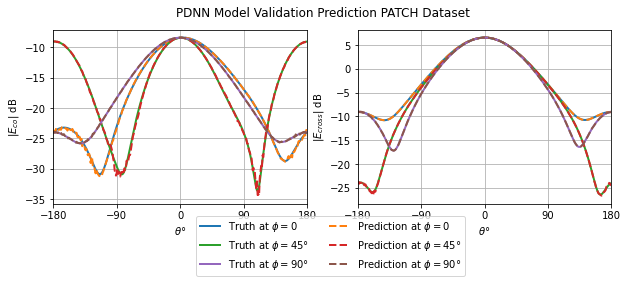

In [122]:
from ssapp.visualization.model_visualisations import plotModelPrediction
import seaborn as sns

print(train_pred.shape)
plotModelPrediction(test_pred,test_fields,idx=200,phi_cuts=[0,1,2],title='PDNN Model Validation Prediction PATCH Dataset')
figSaver('PDNN_Model_Validation_Prediction_PATCH_Dataset')

In [123]:
from ssapp.Utils import get_single_dataset_example

theta = np.linspace(-180,180,361)
print(params)

pred = model(params).detach()

plt.plot(theta,mag(fields[0,:,0,0],fields[0,:,0,1]),label = 'Truth')
plt.plot(theta,mag(pred[0,:,0,0],pred[0,:,0,1]),label = 'Prediction')
plt.ylabel('$|E_{co}|$ dB')
plt.xlabel(r'$\theta$')
plt.legend()


plt.figure()
plt.plot(mag(fields[0,:,0,2],fields[0,:,0,3]),label = 'Truth')
plt.plot(mag(pred[0,:,0,2],pred[0,:,0,3]),label = 'Prediction')
plt.legend()

ImportError: cannot import name 'get_single_dataset_example' from 'ssapp.Utils' (c:\users\niels\documents\github\supervised-machine-learning-for-space-antenna-performance-prediction\ssapp\Utils.py)